# 4.9 Part 2: Instacart


### This script contains the following points:
#### 01. Import libraries and data
#### 02. Create various visualizations based on exercise 4.9
#### 03. Histogram: Order Hour of Day
#### 04. Barchart: loyalty_flag
#### 05. Linechart: Expenditure vs. Order Hour of Day
#### 06. Linechart: Age vs Total Dependants
#### 07. Scatterplot: Age vs Income
#### 08. Export visualizations (completed at the end of each visualization)

# 01.
Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#create data path
path = r'C:\Users\fa_an\OneDrive\CareerFoundry\Tasks\Data Analytics Immersion\Tasks 4.1-4.10\02_2024 Instacart Basket Analysis'

In [4]:
#import data - ords_prods_customers.pkl as df
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

In [5]:
df.shape

(32404859, 33)

In [6]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_or_repeat_order,product_id,add_to_cart_order,...,median_days_between_orders,order_frequency_flag,Gender,State,Age,date_joined,total_dependants,family_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,First Order,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,Repeat Order,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,Repeat Order,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,Repeat Order,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,Repeat Order,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423,both


In [7]:
#drop _merge column (not needed)
df.drop('_merge', axis=1, inplace=True)

In [8]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_or_repeat_order,product_id,add_to_cart_order,...,spending_flag,median_days_between_orders,order_frequency_flag,Gender,State,Age,date_joined,total_dependants,family_status,income
0,2539329,1,prior,1,2,8,NaN,First Order,196,1,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,Repeat Order,196,1,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,Repeat Order,196,1,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,Repeat Order,196,1,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,Repeat Order,196,1,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   order_id                    int64  
 1   user_id                     int64  
 2   eval_set                    object 
 3   order_number                int64  
 4   orders_day_of_week          int64  
 5   order_hour_of_day           int64  
 6   days_since_prior_order      float64
 7   first_or_repeat_order       object 
 8   product_id                  int64  
 9   add_to_cart_order           int64  
 10  reordered                   int64  
 11  product_name                object 
 12  aisle_id                    int64  
 13  department_id               int64  
 14  prices                      float64
 15  price_label                 object 
 16  busiest_day                 object 
 17  busiest_days                object 
 18  busiest_period_of_day       object 
 19  max_order          

In [10]:
df[['order_number','orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'aisle_id', 'department_id', 'prices', 'max_order', 'median_days_between_orders', 'Age', 'total_dependants', 'income']].describe()

,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,aisle_id,department_id,prices,max_order,median_days_between_orders,Age,total_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,7.119612e+01,9.919792e+00,7.790994e+00,3.305217e+01,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,3.821139e+01,6.281485e+00,4.241809e+00,2.515525e+01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


# 02.
If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

([<matplotlib.axis.YTick at 0x1d13e8c5cd0>,
 [Text(0, 0, '0'),
  Text(0, 1000000, '1M'),
  Text(0, 2000000, '2M'),
  Text(0, 3000000, '3M'),
  Text(0, 4000000, '4M'),
  Text(0, 5000000, '5M'),
  Text(0, 6000000, '6M')])

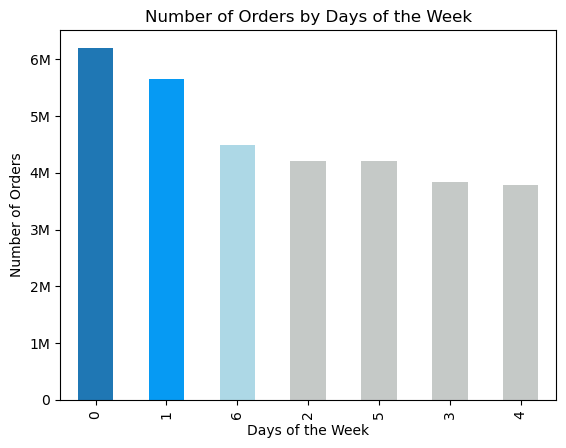

In [11]:
# Define custom colors for each day of the week
custom_colors = ['#1F77B4', '#069AF3', '#ADD8E6', '#C5C9C7', '#C5C9C7', '#C5C9C7', '#C5C9C7']

# Create a bar chart with custom colors
bar = df['orders_day_of_week'].value_counts().plot.bar(color=custom_colors)


# Add labels
plt.xlabel('Days of the Week')
plt.ylabel('Number of Orders')

# Change the title
plt.title('Number of Orders by Days of the Week')

# Manually set y-axis tick labels
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000], ['0', '1M', '2M', '3M', '4M', '5M', '6M'])

([<matplotlib.axis.YTick at 0x1d1415c6d90>,
 [Text(0, 0, '0'),
  Text(0, 200000, '0.2M'),
  Text(0, 400000, '0.4M'),
  Text(0, 600000, '0.6M'),
  Text(0, 800000, '0.8M'),
  Text(0, 1000000, '1M'),
  Text(0, 1200000, '1.2M')])

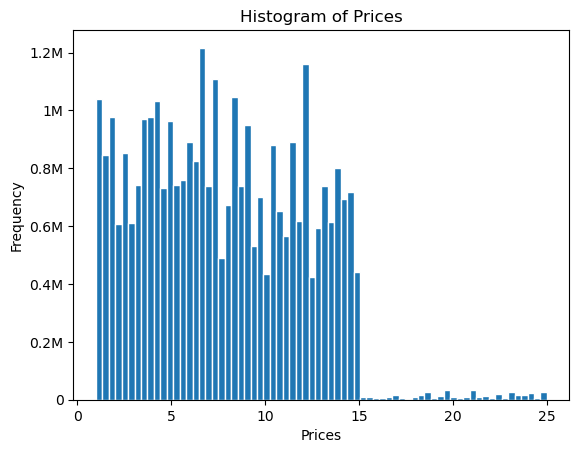

In [13]:
# Create a histogram of prices column with thin lines around the bars
hist = df['prices'].plot.hist(bins=70, edgecolor='white')

# Add labels
plt.xlabel('Prices')
plt.ylabel('Frequency')

# Change the title
plt.title('Histogram of Prices')

# Manually set y-axis tick labels
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000], ['0', '0.2M', '0.4M', '0.6M', '0.8M', '1M', '1.2M'])

In [14]:
df['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [15]:
#Exporting the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

<Axes: xlabel='prices', ylabel='prices'>

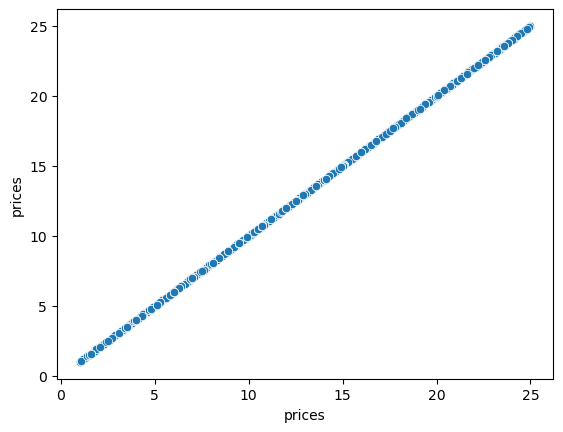

In [16]:
#create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [17]:
df['prices'].mean()

7.790994092173359

In [18]:
df['prices'].median()

7.4

In [19]:
df['prices'].max()

25.0

In [20]:
#creating a line chart
#Sampling Data
#create a list holiding true/false values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(df)) <= 0.7

In [21]:
#store 70% of the sample in the dataframe big
big = df[dev]

In [22]:
#store 30% of the sample in the dataframe small
small = df[~dev]

In [23]:
#use len to check sample data/subsetting steps
len (df)

32404859

In [24]:
len(big) + len(small)

32404859

In [25]:
#reducing sample based on neccessary columns to pull data from
df_2 = small[['orders_day_of_week', 'prices']]

C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


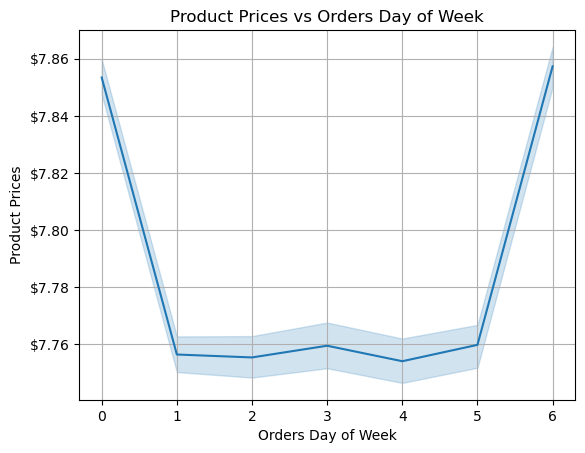

In [66]:
import matplotlib.ticker as ticker

#create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

# Add custom chart title
plt.title('Product Prices vs Orders Day of Week')

# Update x and y axis titles
plt.xlabel('Orders Day of Week')
plt.ylabel('Product Prices')

# Format y-axis ticks as currency
formatter = ticker.FormatStrFormatter('$%.2f')  # Change '.2f' to adjust decimal places
plt.gca().yaxis.set_major_formatter(formatter)

# Add grid
plt.grid(True)

In [67]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices.png'))

# 03.
You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

([<matplotlib.axis.YTick at 0x1d143840a90>,
 [Text(0, 0, '0'),
  Text(0, 500000, '0.5M'),
  Text(0, 1000000, '1M'),
  Text(0, 1500000, '1.5M'),
  Text(0, 2000000, '2M'),
  Text(0, 2500000, '2.5M')])

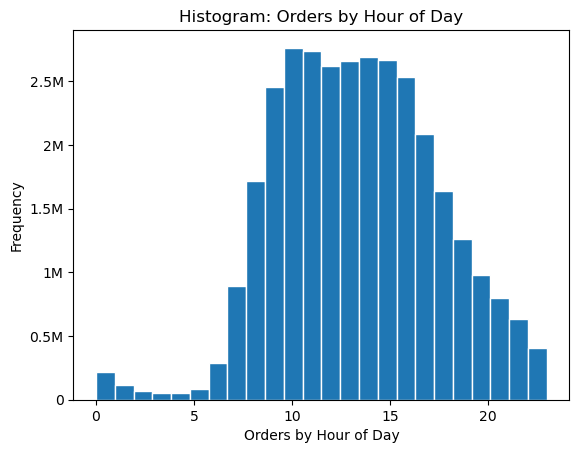

In [28]:
#create a histogram of orders hour of day column
hist_2 = df['order_hour_of_day'].plot.hist(bins = 24, edgecolor='white')

# Add labels
plt.xlabel('Orders by Hour of Day')
plt.ylabel('Frequency')

# Change the title
plt.title('Histogram: Orders by Hour of Day')
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000], ['0', '0.5M', '1M', '1.5M', '2M', '2.5M'])

In [29]:
df['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [30]:
df['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

In [31]:
#save hist_2
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ohd.png'))

#### Peak hours for ordering are between 9a-4p. The largest number of orders are at 10a, 11a, and 2p. Off-peak hours are between 11p to 6a.

# 04.
The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

([<matplotlib.axis.YTick at 0x1d143960790>,
 [Text(0, 0, '0'),
  Text(0, 2000000, '2M'),
  Text(0, 4000000, '4M'),
  Text(0, 6000000, '6M'),
  Text(0, 8000000, '8M'),
  Text(0, 10000000, '10M'),
  Text(0, 12000000, '12M'),
  Text(0, 14000000, '14M'),
  Text(0, 16000000, '16M')])

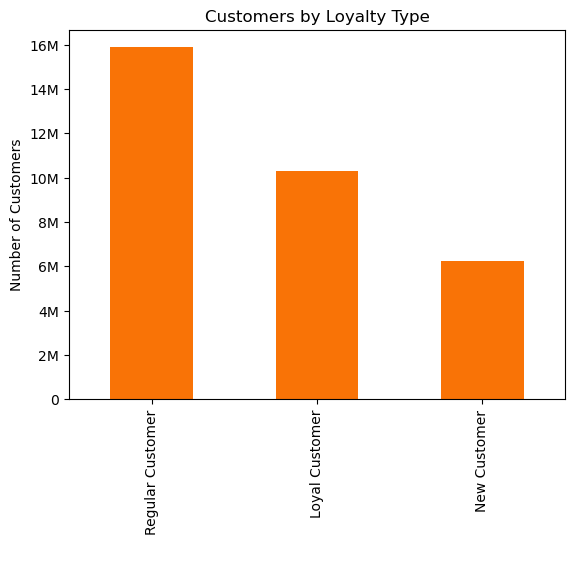

In [32]:
#create a bar chart w/ custom color
bar_2 = df['loyalty_flag'].value_counts().plot.bar(color='#F97306')
# Add labels
plt.xlabel (' ')
plt.ylabel('Number of Customers')
# Change the title
plt.title('Customers by Loyalty Type')
# Manually set y-axis tick labels
plt.yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000, 16000000], ['0', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M'])

In [33]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_custloyal.png'))

In [34]:
df['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular Customer    15876776
Loyal Customer      10284093
New Customer         6243990
Name: count, dtype: int64

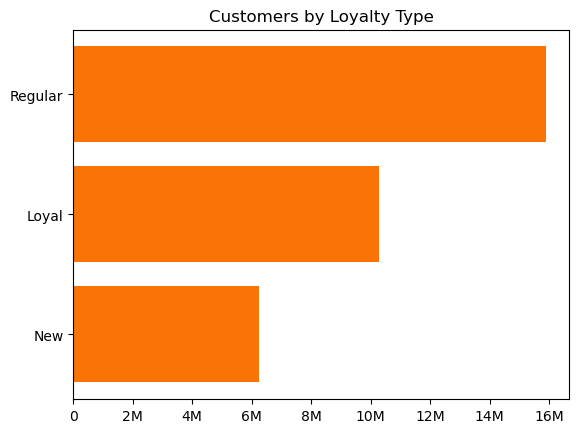

In [35]:
# Define data
categories = ['Regular', 'Loyal', 'New']
values1 = [15876776, 10284093, 6243990]

# Reverse the order of categories and values
categories.reverse()
values1.reverse()

# Plot the horizontal bar chart
plt.barh(categories, values1, color='#F97306', label='Value 1')

# Change the title
plt.title('Customers by Loyalty Type')

# Set custom ticks
plt.xticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000, 16000000], ['0', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M'])

# Save the plot to a file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hbar_custloyal2.png'))


# 05.
Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [36]:
# small sample created previously , use df_3
df_3=small[['order_hour_of_day', 'prices']]

C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Prices')

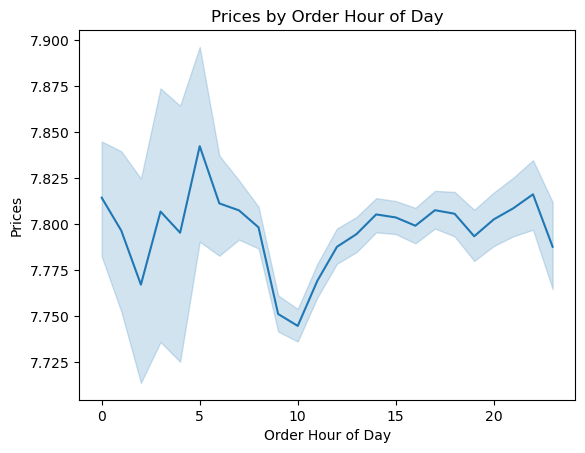

In [37]:
#create line chart based on df_3 and small sample
line_2=sns.lineplot(data= df_3, x = 'order_hour_of_day', y = 'prices')

# Add title and axis labels
plt.title('Prices by Order Hour of Day')
plt.xlabel('Order Hour of Day')
plt.ylabel('Prices')

#### Looks like that based on the Hour of Day, the prices are higher during the non-peak hours.

In [38]:
#save line_2 visualization
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_by_hour.png'))

In [39]:
#groupby to create expenditure (sum of prices by order_id) and add column at end of df
df['sum_order'] = df.groupby(['order_id'])['prices'].transform('sum')

In [40]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_or_repeat_order,product_id,add_to_cart_order,...,median_days_between_orders,order_frequency_flag,Gender,State,Age,date_joined,total_dependants,family_status,income,sum_order
0,2539329,1,prior,1,2,8,NaN,First Order,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423,31.6
1,2398795,1,prior,2,3,7,15.0,Repeat Order,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423,35.4
2,473747,1,prior,3,3,12,21.0,Repeat Order,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423,28.2
3,2254736,1,prior,4,4,7,29.0,Repeat Order,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423,26.0
4,431534,1,prior,5,4,15,28.0,Repeat Order,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,02-17-2019,3,married,40423,57.0


In [41]:
#creating a line chart
#Sampling Data
#create a list holiding true/false values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(df)) <= 0.7

In [42]:
#store 70% of the sample in the dataframe big
big = df[dev]

In [43]:
#store 30% of the sample in the dataframe small
small = df[~dev]

In [44]:
#use len to check sample data/subsetting steps
len (df)

32404859

In [45]:
len(big) + len(small)

32404859

In [46]:
# small sample using df_5
df_5=small[['order_hour_of_day', 'sum_order']]

C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


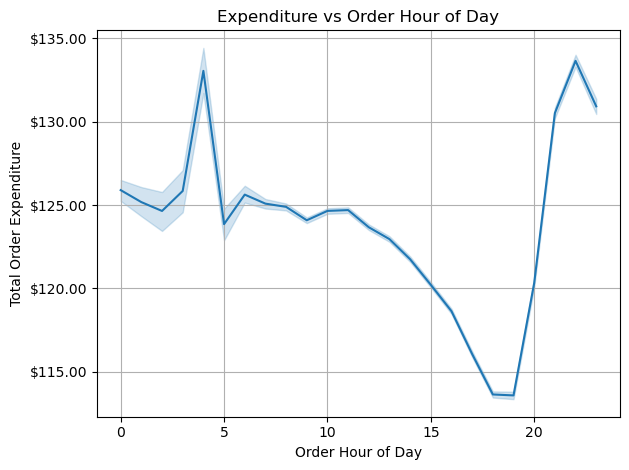

In [48]:
import matplotlib.ticker as ticker

#create line chart based on df_5 and small sample
line_5=sns.lineplot(data= df_5, x = 'order_hour_of_day', y = 'sum_order')

# Add title and axis labels
plt.title('Expenditure vs Order Hour of Day')
plt.xlabel('Order Hour of Day')
plt.ylabel('Total Order Expenditure')

# Format y-axis ticks as currency
formatter = ticker.FormatStrFormatter('$%.2f')  # Change '.2f' to adjust decimal places
plt.gca().yaxis.set_major_formatter(formatter)

# Add grid
plt.grid(True)

# Adjust plot dimensions
plt.tight_layout()

#### I can say when grouping the price sum by order first and then comparing against the time of day, it's alot clearer to see the meaning. Which is that during off-peak hours the expenditure is higher.

In [49]:
#save line_5 visualization
line_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditure_by_hour.png'))

# 06.
Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [50]:
# small sample created previously , use df_4 (no need for a groupby)
df_4 = small[['Age', 'total_dependants']]

C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([<matplotlib.axis.XTick at 0x1d143cb5810>,
 [Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65'),
  Text(70, 0, '70'),
  Text(75, 0, '75'),
  Text(80, 0, '80')])

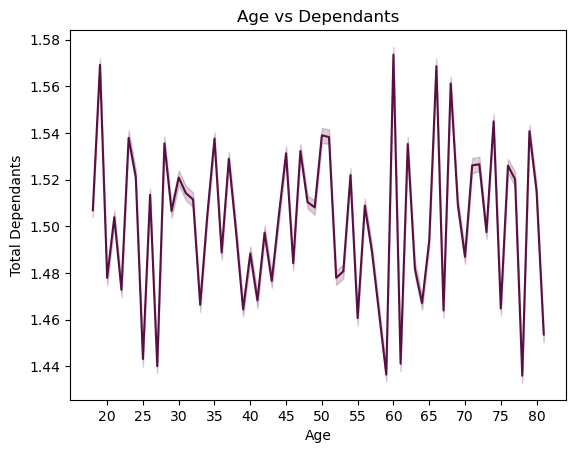

In [51]:
#define custom color
custom_color = '#580F41'

#create line chart based on df_4 and small sample
line_3 = sns.lineplot(x = 'Age', y = 'total_dependants', data = df, color = custom_color)

# Add title and axis labels
plt.title('Age vs Dependants')
plt.xlabel('Age')
plt.ylabel('Total Dependants')

# Set x-axis ticks at custom positions, start at 20, end at 85, increments of 5
plt.xticks(range(20, 85, 5))

In [52]:
df['total_dependants'].describe()

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: total_dependants, dtype: float64

#### There does not look to be a solid relationship between Age and Dependants. It seems to be quite varied or all over the place.

In [53]:
#save line_3 visualization
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

# 07.
You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

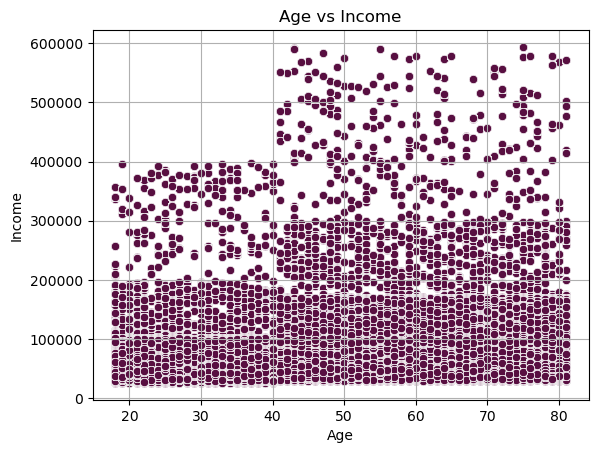

In [54]:
# Define custom color
custom_color = '#580F41'

# Create a scatterplot age vs income with custom color
scatter_1 = sns.scatterplot(x='Age', y='income', data=df, color = custom_color)

# Add title and axis labels
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')

# Add grid
plt.grid(True)

In [55]:
df['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

#### The concentration of income is 200,00 and under for all age groups. And aged 40 and older have a higher concentration of income between 200,000 and 300,000.

In [56]:
#save scatter_1 visualization
scatter_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   order_id                    int64  
 1   user_id                     int64  
 2   eval_set                    object 
 3   order_number                int64  
 4   orders_day_of_week          int64  
 5   order_hour_of_day           int64  
 6   days_since_prior_order      float64
 7   first_or_repeat_order       object 
 8   product_id                  int64  
 9   add_to_cart_order           int64  
 10  reordered                   int64  
 11  product_name                object 
 12  aisle_id                    int64  
 13  department_id               int64  
 14  prices                      float64
 15  price_label                 object 
 16  busiest_day                 object 
 17  busiest_days                object 
 18  busiest_period_of_day       object 
 19  max_order          

In [58]:
#convert dtypes to save on memory size
df[['order_id', 'user_id', 'product_id', 'income']] = df[['order_id', 'user_id', 'product_id', 'income']].astype('int32')

In [59]:
df[['order_number', 'orders_day_of_week', 'order_hour_of_day', 'reordered', 'department_id', 'max_order', 'Age', 'total_dependants']] = df[['order_number', 'orders_day_of_week', 'order_hour_of_day', 'reordered', 'department_id', 'max_order', 'Age', 'total_dependants']].astype('int8')

In [60]:
df[['days_since_prior_order', 'median_days_between_orders']] = df[['days_since_prior_order', 'median_days_between_orders']].astype('float16')

In [61]:
df[['add_to_cart_order']] = df[['add_to_cart_order']].astype('uint8')

In [62]:
df[['aisle_id']] = df[['aisle_id']].astype('int16')

In [63]:
df[['prices', 'mean_product_price', 'sum_order']] = df[['prices', 'mean_product_price', 'sum_order']].astype('float32')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   order_id                    int32  
 1   user_id                     int32  
 2   eval_set                    object 
 3   order_number                int8   
 4   orders_day_of_week          int8   
 5   order_hour_of_day           int8   
 6   days_since_prior_order      float16
 7   first_or_repeat_order       object 
 8   product_id                  int32  
 9   add_to_cart_order           uint8  
 10  reordered                   int8   
 11  product_name                object 
 12  aisle_id                    int16  
 13  department_id               int8   
 14  prices                      float32
 15  price_label                 object 
 16  busiest_day                 object 
 17  busiest_days                object 
 18  busiest_period_of_day       object 
 19  max_order          

In [65]:
#Export the updated df in pickle format as “ords_prods_customers_rev.pkl”. (incl sum_orders column)
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customers_rev.pkl'))